# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.
Observation
1-Climates in the Southern Hemisphere are milder than those in the Northern Hemisphere at equivalent latitudes. This is because the Southern Hemisphere has far more ocean and far less land because water heats and cools far more slowly than land.

2-The highest temperature is found at 0 latitude, and the temperature lowers as latitude climbs or decreases. Because of the curvature of the planet, the equatorial zone receives sunlight straight, with little or no angle.

3-Wind speed is not strongly influenced by latitude. The strength of the air pressure gradient determines the wind speed; the greater the pressure gradient, the faster the wind.

In [28]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key
from citipy import citipy
# https://pypi.org/project/citipy/ (pip install citipy)

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [29]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

615

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [30]:
#OpenWeather Key
api_key = weather_api_key
units = "imperial"

query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={api_key}&units={units}&q="

# define count of pass throughs
count_one = 0
set_one = 1

print(query_url)

http://api.openweathermap.org/data/2.5/weather?appid=8b12adb4095f65c801ada39635129624&units=imperial&q=


In [31]:
city_two = []
cloudinesses = []
dates = []
humidities = []
lats = []
lngs = []
max_temps = []
wind_speeds = []
countries = []

count_one = 0
set_one = 1

# loops for creating dataframe columns
for city in cities:
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        cloudinesses.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        if count_one > 48:
            count_one = 1
            set_one += 1
            city_two.append(city)
        else:
            count_one += 1
            city_two.append(city)
        print(f"Processing Record {count_one} of Set {set_one} | {city}")
    except Exception:
        print("City not found. Skipping...")
print("------------------------------\nData Retrieval Complete\n------------------------------")

Processing Record 1 of Set 1 | puerto ayora
Processing Record 2 of Set 1 | merauke
Processing Record 3 of Set 1 | ahipara
Processing Record 4 of Set 1 | bredasdorp
Processing Record 5 of Set 1 | hobyo
Processing Record 6 of Set 1 | dong xoai
Processing Record 7 of Set 1 | lebu
Processing Record 8 of Set 1 | tiznit
Processing Record 9 of Set 1 | mataura
Processing Record 10 of Set 1 | apiai
Processing Record 11 of Set 1 | albany
Processing Record 12 of Set 1 | vagur
Processing Record 13 of Set 1 | avarua
City not found. Skipping...
Processing Record 14 of Set 1 | arkhara
City not found. Skipping...
Processing Record 15 of Set 1 | hamilton
Processing Record 16 of Set 1 | port alfred
Processing Record 17 of Set 1 | hermanus
Processing Record 18 of Set 1 | butaritari
Processing Record 19 of Set 1 | danshui
Processing Record 20 of Set 1 | leningradskiy
Processing Record 21 of Set 1 | kyaikto
Processing Record 22 of Set 1 | east london
Processing Record 23 of Set 1 | severo-kurilsk
Processin

Processing Record 42 of Set 4 | helong
Processing Record 43 of Set 4 | tarragona
Processing Record 44 of Set 4 | haftoni
Processing Record 45 of Set 4 | tanete
City not found. Skipping...
Processing Record 46 of Set 4 | san cristobal
Processing Record 47 of Set 4 | brae
Processing Record 48 of Set 4 | klyuchevskiy
Processing Record 49 of Set 4 | ormara
Processing Record 1 of Set 5 | jiangyou
Processing Record 2 of Set 5 | guerrero negro
Processing Record 3 of Set 5 | nizhniy odes
Processing Record 4 of Set 5 | pestovo
Processing Record 5 of Set 5 | athens
Processing Record 6 of Set 5 | sao filipe
City not found. Skipping...
Processing Record 7 of Set 5 | cherskiy
Processing Record 8 of Set 5 | coihaique
Processing Record 9 of Set 5 | acarau
Processing Record 10 of Set 5 | ingham
Processing Record 11 of Set 5 | tasiilaq
Processing Record 12 of Set 5 | antofagasta
Processing Record 13 of Set 5 | saint-pierre
Processing Record 14 of Set 5 | ouadda
Processing Record 15 of Set 5 | madre de 

City not found. Skipping...
Processing Record 30 of Set 8 | yar-sale
Processing Record 31 of Set 8 | jalu
Processing Record 32 of Set 8 | jizan
Processing Record 33 of Set 8 | yulara
Processing Record 34 of Set 8 | tokur
Processing Record 35 of Set 8 | boende
Processing Record 36 of Set 8 | morgaushi
City not found. Skipping...
Processing Record 37 of Set 8 | abha
Processing Record 38 of Set 8 | lazaro cardenas
City not found. Skipping...
Processing Record 39 of Set 8 | lensk
Processing Record 40 of Set 8 | basco
Processing Record 41 of Set 8 | kamyshin
City not found. Skipping...
Processing Record 42 of Set 8 | kenai
Processing Record 43 of Set 8 | nuevo progreso
Processing Record 44 of Set 8 | san ramon
Processing Record 45 of Set 8 | san quintin
City not found. Skipping...
Processing Record 46 of Set 8 | peniche
City not found. Skipping...
Processing Record 47 of Set 8 | poronaysk
Processing Record 48 of Set 8 | haines city
Processing Record 49 of Set 8 | saint-augustin
Processing R

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [32]:
weather_dict = {
    "City": city_two,
    "Cloudiness": cloudinesses,
    "Country": countries,
    "Date": dates,
    "Humidity": humidities,
    "Lat": lats,
    "Lng": lngs,
    "Max Temp": max_temps,
    "Wind Speed": wind_speeds
}

In [33]:
weather_dataframe = pd.DataFrame(weather_dict)

# show the top of the dataframe
weather_dataframe.head(15)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,puerto ayora,0,ES,1644202568,78,36.5939,-6.2330,54.25,5.75
1,merauke,77,ID,1644202505,63,-8.4667,140.3333,86.92,7.47
2,ahipara,97,NZ,1644202569,96,-35.1667,173.1667,75.11,6.17
3,bredasdorp,13,ZA,1644202570,88,-34.5322,20.0403,65.28,5.75
4,hobyo,98,SO,1644202422,72,5.3505,48.5268,75.52,17.36
5,dong xoai,44,CM,1644202571,37,4.8950,12.0057,63.54,0.40
6,lebu,3,CL,1644202571,92,-37.6167,-73.6500,59.22,15.41
7,tiznit,4,MA,1644202572,22,29.5833,-9.5000,60.64,6.98
8,mataura,8,NZ,1644202534,34,-46.1927,168.8643,60.48,2.75
9,apiai,59,BR,1644202572,100,-24.5094,-48.8425,63.93,2.19


In [34]:
# Exporting to CSV

weather_dataframe.to_csv("weather_df1.csv")

In [35]:
# Checking New DataFrame & Cleaning the Data

weather_data = pd.read_csv("weather_df1.csv")
weather_df2 = weather_data.drop(columns=["Unnamed: 0"])
weather_df2.head(15)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,puerto ayora,0,ES,1644202568,78,36.5939,-6.2330,54.25,5.75
1,merauke,77,ID,1644202505,63,-8.4667,140.3333,86.92,7.47
2,ahipara,97,NZ,1644202569,96,-35.1667,173.1667,75.11,6.17
3,bredasdorp,13,ZA,1644202570,88,-34.5322,20.0403,65.28,5.75
4,hobyo,98,SO,1644202422,72,5.3505,48.5268,75.52,17.36
5,dong xoai,44,CM,1644202571,37,4.8950,12.0057,63.54,0.40
6,lebu,3,CL,1644202571,92,-37.6167,-73.6500,59.22,15.41
7,tiznit,4,MA,1644202572,22,29.5833,-9.5000,60.64,6.98
8,mataura,8,NZ,1644202534,34,-46.1927,168.8643,60.48,2.75
9,apiai,59,BR,1644202572,100,-24.5094,-48.8425,63.93,2.19


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

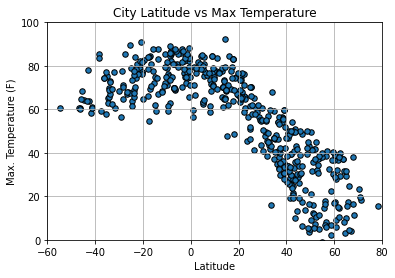

In [36]:
#Create a Scatter Plot for Lattitude vs Temperature of City
plt.scatter(weather_dataframe["Lat"], weather_dataframe["Max Temp"], marker='o',s=30, edgecolors= "black")
plt.title("City Latitude vs Max Temperature")

plt.ylim(0,100)
plt.xlim(-60, 80)

plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid()
# plt.show()

plt.savefig("LAT VS TEMP.png")

#### Latitude vs. Humidity Plot

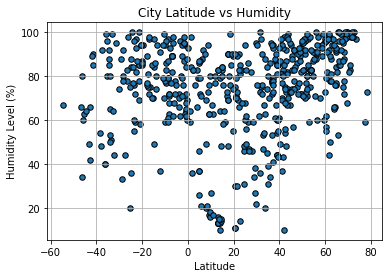

In [37]:
#create a Scatter Plot for Lattitude vs Humidity
plt.scatter(weather_dataframe["Lat"], weather_dataframe["Humidity"], marker='o', s=30, edgecolors= "black")
plt.title("City Latitude vs Humidity")
plt.ylabel("Humidity Level (%)")
plt.xlabel("Latitude")
plt.grid()
# plt.show()

plt.savefig('LAT VS HUM.png')

#### Latitude vs. Cloudiness Plot

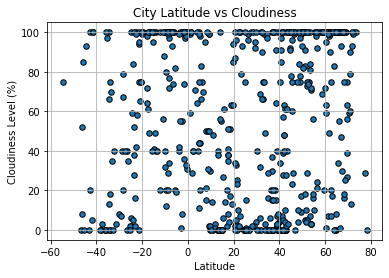

In [38]:
plt.scatter(weather_dataframe["Lat"], weather_dataframe["Cloudiness"], marker='o', s=30, edgecolors= "black")
plt.title("City Latitude vs Cloudiness")
plt.ylabel("Cloudiness Level (%)")
plt.xlabel("Latitude")
plt.grid()
# plt.show()

plt.savefig('LAT VS CLOUD.png')

#### Latitude vs. Wind Speed Plot

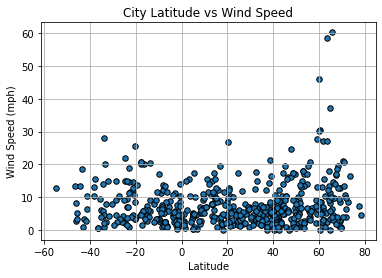

In [39]:
plt.scatter(weather_dataframe["Lat"], weather_dataframe["Wind Speed"], marker='o', s=30, edgecolors= "black")
plt.title("City Latitude vs Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid()
# plt.show()

plt.savefig('LAT VS WIND.png')

## Linear Regression

In [40]:
# OPTIONAL: Create a function to create Linear Regression plots


In [41]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere = weather_dataframe.loc[weather_dataframe["Lat"]>0.01]
southern_hemisphere = weather_dataframe.loc[weather_dataframe["Lat"]<-0.01]

# northern_hemisphere.head()
southern_hemisphere.head()


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
1,merauke,77,ID,1644202505,63,-8.4667,140.3333,86.92,7.47
2,ahipara,97,NZ,1644202569,96,-35.1667,173.1667,75.11,6.17
3,bredasdorp,13,ZA,1644202570,88,-34.5322,20.0403,65.28,5.75
6,lebu,3,CL,1644202571,92,-37.6167,-73.6500,59.22,15.41
8,mataura,8,NZ,1644202534,34,-46.1927,168.8643,60.48,2.75


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

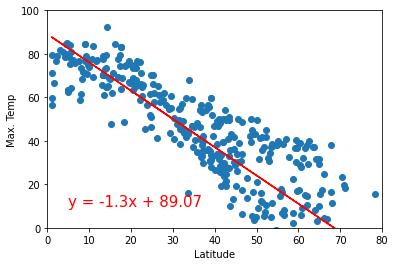

In [42]:
#Create a Scatter Plot for Lattitude vs Temperature of City
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"red")
plt.annotate(line_eq,(5,10),fontsize=15,color="red")

plt.ylim(0,100)
plt.xlim(0, 80)

plt.ylabel("Max. Temp")
plt.xlabel("Latitude")
# plt.show()

plt.savefig("NORTH MAX TEMP VS LAT.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

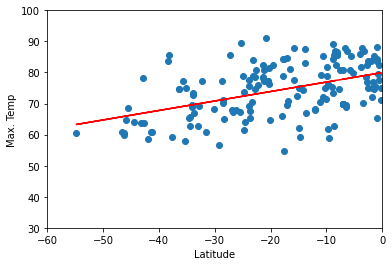

In [43]:
#Create a Scatter Plot for Lattitude vs Temperature of City (Southern Hemisphere)
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.ylim(30, 100)
plt.xlim(-60, 0, 10)

plt.ylabel("Max. Temp")
plt.xlabel("Latitude")
# plt.show()

plt.savefig("SOUTH MAX TEMP VS LAT.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

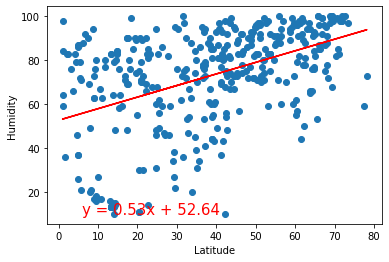

In [44]:
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
# plt.show()

plt.savefig("NORTH HUM VS LAT.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

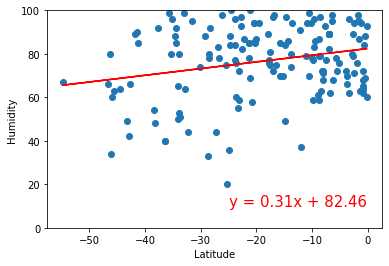

In [45]:
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,10),fontsize=15,color="red")

plt.ylim(0, 100)

plt.ylabel("Humidity")
plt.xlabel("Latitude")
# plt.show()

plt.savefig("SOUTH HUM VS LAT.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

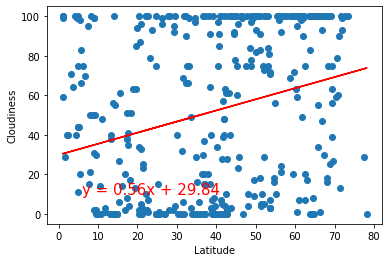

In [46]:
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
# plt.show()

plt.savefig("NORTH CLOUD VS LAT.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

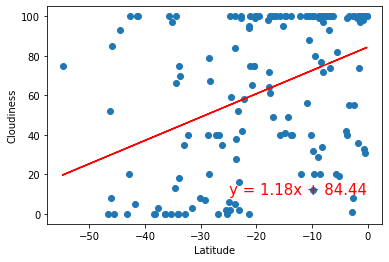

In [47]:
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,10),fontsize=15,color="red")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
# plt.show()

plt.savefig("SOUTH CLOUD VS LAT.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

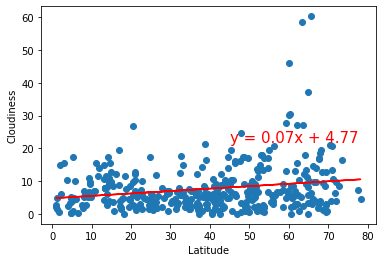

In [48]:
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,22),fontsize=15,color="red")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
# plt.show()

plt.savefig("NORTH WIND VS LAT.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

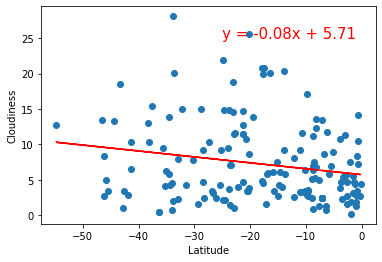

In [49]:
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,25),fontsize=15,color="red")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
# plt.show()

plt.savefig("SOUTH WIND VS LAT.png")